# Image Classification ON American Sign Language

The original MNIST(Modified National Institute of Standards and Technology) image dataset of handwritten digits is a popular benchmark for image-based machine learning methods. The American Sign Language letter database of hand gestures represent a multi-class problem with 24 classes of letters (excluding J and Z which require motion).

Each training and test case represents a label (0–25) as a one-to-one map for each alphabetic letter A-Z (and no cases for 9=J or 25=Z because of gesture motions).

In [337]:
import pandas as pd
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
from sklearn import metrics 
from sklearn.decomposition import PCA

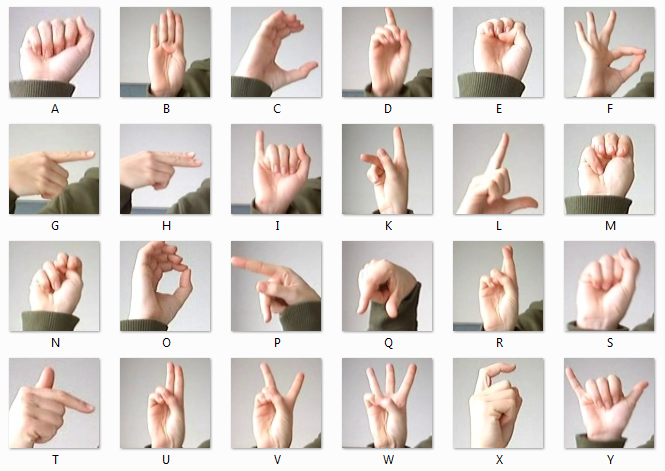

In [338]:
# one-to-one map for each alphabetic letter A-Z 

from IPython.display import Image
Image(filename="archive/amer_sign2.png", width= 800, height=500)

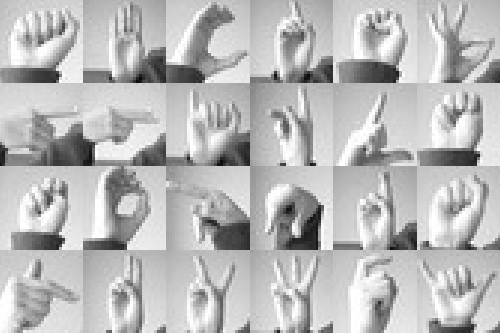

In [339]:
# one-to-one map for each alphabetic letter A-Z 

from IPython.display import Image
Image(filename="archive/amer_sign3.png", width= 800, height=500)

## Index of the project

- Loading the data 
- Exploratory data analysis (EDA)
- converting pandas dataframe to Numpy array
- Data visualization
- Data Preprocessing
- Training the data with machine learning models
- Training the data with CNN
- Model performance comparasion
- Conclusion

## 1. Loading Data

The data is downloaded from  https://www.kaggle.com/datamunge/sign-language-mnist 

The dataset format is patterned to match closely with the classic MNIST. Each training and test case represent a label (0-25) as a one-to-one map for each alphabet letter A-Z. 

The training data (27,455 cases) and test data (7172 cases) are approximately half the size of the standard MNIST but otherwise similar with a header row of label,

pixel1,pixel2….pixel784 which represent a single 28x28 pixel image with grayscale values between 0-255.

In [340]:
trainData = pd.read_csv("archive/sign_mnist_train.csv")
testData = pd.read_csv('archive/sign_mnist_test.csv')
No_classes = 26

## 2. EDA
here we will analyse and find useful paarameters from the data


In [341]:
trainData.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [342]:
trainData.shape

(27455, 785)

In [343]:
trainData.isna().sum().max()
#so we can see the data is clean of null values

0

In [344]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [345]:
labels = trainData.label.unique()
np.sort(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

In [346]:
trainData.describe().T
#no need for this as the data is for images and the pixel will always be between 0-255


,count,mean,std,min,25%,50%,75%,max
label,27455.0,12.318813,7.287552,0.0,6.0,13.0,19.0,24.0
pixel1,27455.0,145.419377,41.358555,0.0,121.0,150.0,174.0,255.0
pixel2,27455.0,148.500273,39.942152,0.0,126.0,153.0,176.0,255.0
pixel3,27455.0,151.247714,39.056286,0.0,130.0,156.0,178.0,255.0
pixel4,27455.0,153.546531,38.595247,0.0,133.0,158.0,179.0,255.0
...,...,...,...,...,...,...,...,...
pixel780,27455.0,162.736696,63.444008,0.0,125.0,184.0,207.0,255.0
pixel781,27455.0,162.906137,63.509210,0.0,128.0,184.0,207.0,255.0
pixel782,27455.0,161.966454,63.298721,0.0,128.0,182.0,206.0,255.0
pixel783,27455.0,161.137898,63.610415,0.0,128.0,182.0,204.0,255.0


In [347]:
testData.isna().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

## 3. Converting the pandas Dataframe into Numpy Arrays

We will now need to seperate our features and labels for both test and training sets

In [348]:
x_train = (trainData.drop(columns=['label'])).to_numpy()
y_train = (trainData['label']).to_numpy()
x_valid = (validData.drop(columns=['label'])).to_numpy()
y_valid = (validData['label']).to_numpy()

In [349]:
x_valid.shape

(7172, 784)

## 4. Visualization

<Axes: xlabel='label', ylabel='count'>

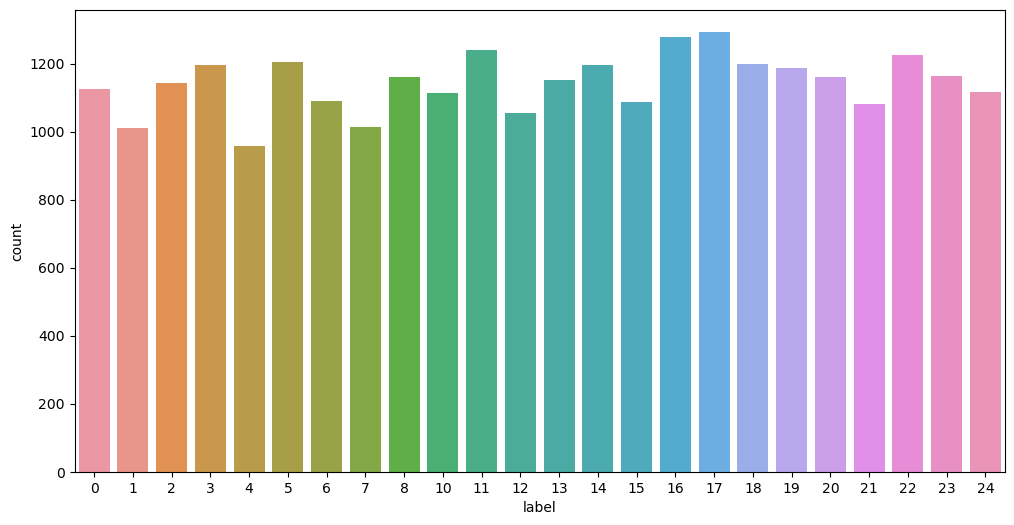

In [350]:
sns.countplot(x='label', data=trainData)

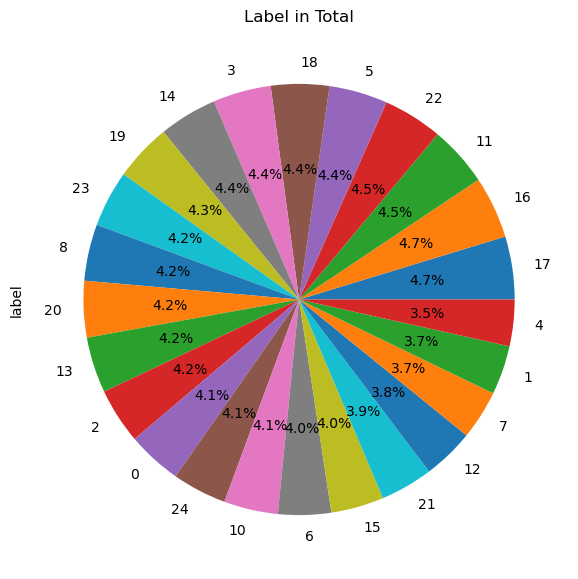

In [351]:
trainData['label'].value_counts().plot(kind='pie',autopct='%1.1f%%',figsize=(7,7))
plt.title("Label in Total")
plt.show()

One thing to observe is that the data is equally distributed. So, we can use accuracy as a metric to measure performance

Actual Label :  H


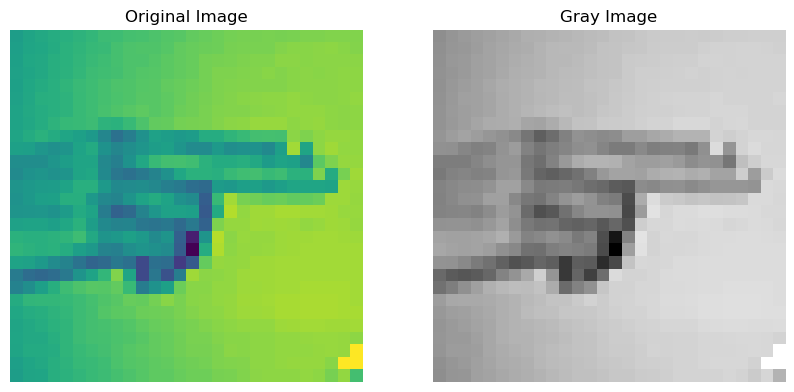

In [352]:
def Show_Train_Image(row):
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,10))
    fig.figsize=(1,1)
    img =np.reshape(x_train[row], (28, 28))
    print("Actual Label : ",chr(ord('A')+y_train[row]))
    ax1.set_title("Original Image")
    ax1.axis("off")
    ax1.imshow(img);
    ax2.axis("off")
    ax2.set_title("Gray Image")
    ax2.imshow(img,cmap='gray');
Show_Train_Image(345)    

## 5.Data preprocessing

In [353]:

# So we will now do principle component analysis

pca = PCA().fit(x_train)


The number of components needed to explain variance :  113


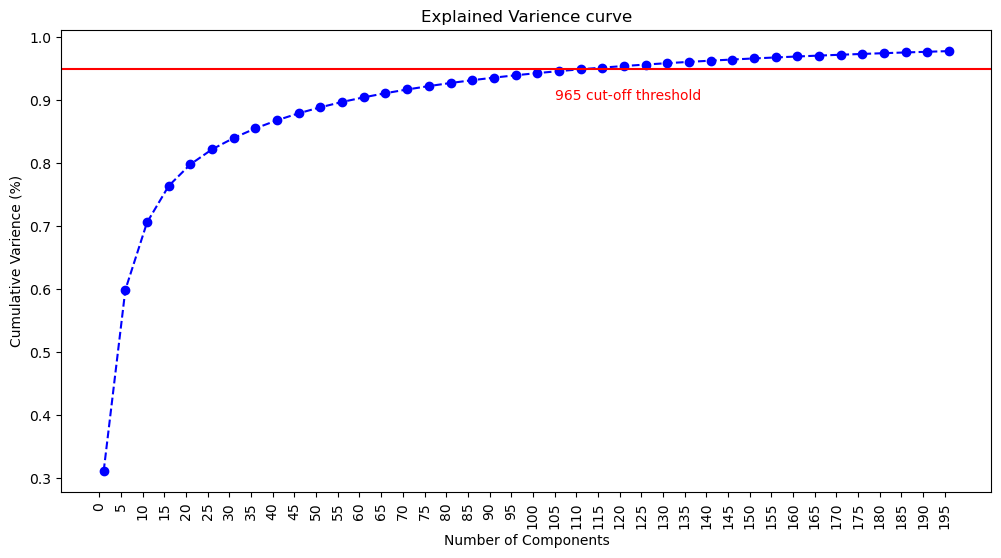

In [354]:
# visualizing the cumulative covarience curve

plt.rcParams['figure.figsize']= (12,6)

fig, ax = plt.subplots()
x = np.arange(1,800, step = 1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.plot(x[:200:5], y[:200:5], marker='o', color='b', linestyle='--')
plt.xlabel("Number of Components")
plt.xticks(np.arange(0,200,step=5), rotation=90)
plt.ylabel("Cumulative Varience (%)")
plt.title("Explained Varience curve")

plt.axhline(y = 0.95, color='r')
plt.text(105,0.9, "965 cut-off threshold", color='red')

for i,j in zip(x,y):
    if(j>0.95):
        print('The number of components needed to explain variance : ',i)
        break

## 6.Model selection and training

As we have both features and labels, supervised learning provides most suitable models.

There are two major types of supervised machine learning problems, called classification and regression. Our data set comes under classification problem, as the classification of sign Language are categorical problem in term of machine learning. The supervised machine learning models (classification) considered to train the dataset in this notebook are:

- Logistic Regression
- Decision Tree
- Support Vector Machine
- Random Forest
- Naive Bayes Classifier
- k-Nearest Neighbors

The metric that we will be using is accuracy(reason explained earlier), confusion_matrix and classification report

In [355]:
Model_name = []
acc_train = []
acc_test = []

def storeResults(models,a , b):
    Model_name.append(model)
    acc_train.append(a)
    acc_test.append(b)


### 6.1. Logistic regression

Logistic Regression is a binary classification algorithm used to predict the probability that an instance belongs to one of two classes. It uses a sigmoid function to map input features to probabilities between 0 and 1. The model is trained to find the optimal weights that minimize the difference between predicted probabilities and actual binary labels. It is widely used in various fields for tasks like spam detection, medical diagnosis, and more.

In [356]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

log_clf = Pipeline([('reduce_dims', PCA(n_components=113)),
                    ('model', LogisticRegression(multi_class='multinomial', random_state = 0))])

log_clf.fit(x_train, y_train)

Pipeline(steps=[('reduce_dims', PCA(n_components=113)),
                ('model',
                 LogisticRegression(multi_class='multinomial',
                                    random_state=0))])

In [357]:
log_predict = log_clf.predict(x_test)
log_predict_train = log_clf.predict(x_train)

In [358]:
y_test

0        6
1        5
2       10
3        0
4        3
        ..
7167     1
7168    12
7169     2
7170     4
7171     2
Name: label, Length: 7172, dtype: int64

In [359]:
x_test_accuracy_log = metrics.accuracy_score(y_test, log_predict)
x_train_accuracy_log = metrics.accuracy_score(y_train, log_predict_train)
print("Logistic Regression : Accuracy on training Data: {:.3f}".format(x_train_accuracy))
print("Logistic Regression: Accuracy on test Data: {:.3f}".format(x_test_accuracy))

Logistic Regression : Accuracy on training Data: 1.000
Logistic Regression: Accuracy on test Data: 0.666


We can see that the model is extemely overfitting

In [360]:
print(metrics.classification_report(y_test, log_predict))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85       331
           1       1.00      0.81      0.89       432
           2       0.93      0.93      0.93       310
           3       0.86      0.76      0.80       245
           4       0.87      0.95      0.91       498
           5       0.66      0.91      0.77       247
           6       0.86      0.72      0.79       348
           7       0.78      0.65      0.71       436
           8       0.65      0.68      0.67       288
          10       0.55      0.37      0.44       331
          11       0.52      0.80      0.63       209
          12       0.62      0.63      0.62       394
          13       0.75      0.48      0.59       291
          14       0.95      0.59      0.73       246
          15       0.86      0.92      0.89       347
          16       0.60      0.74      0.67       164
          17       0.17      0.32      0.22       144
          18       0.29    

<Figure size 800x800 with 0 Axes>

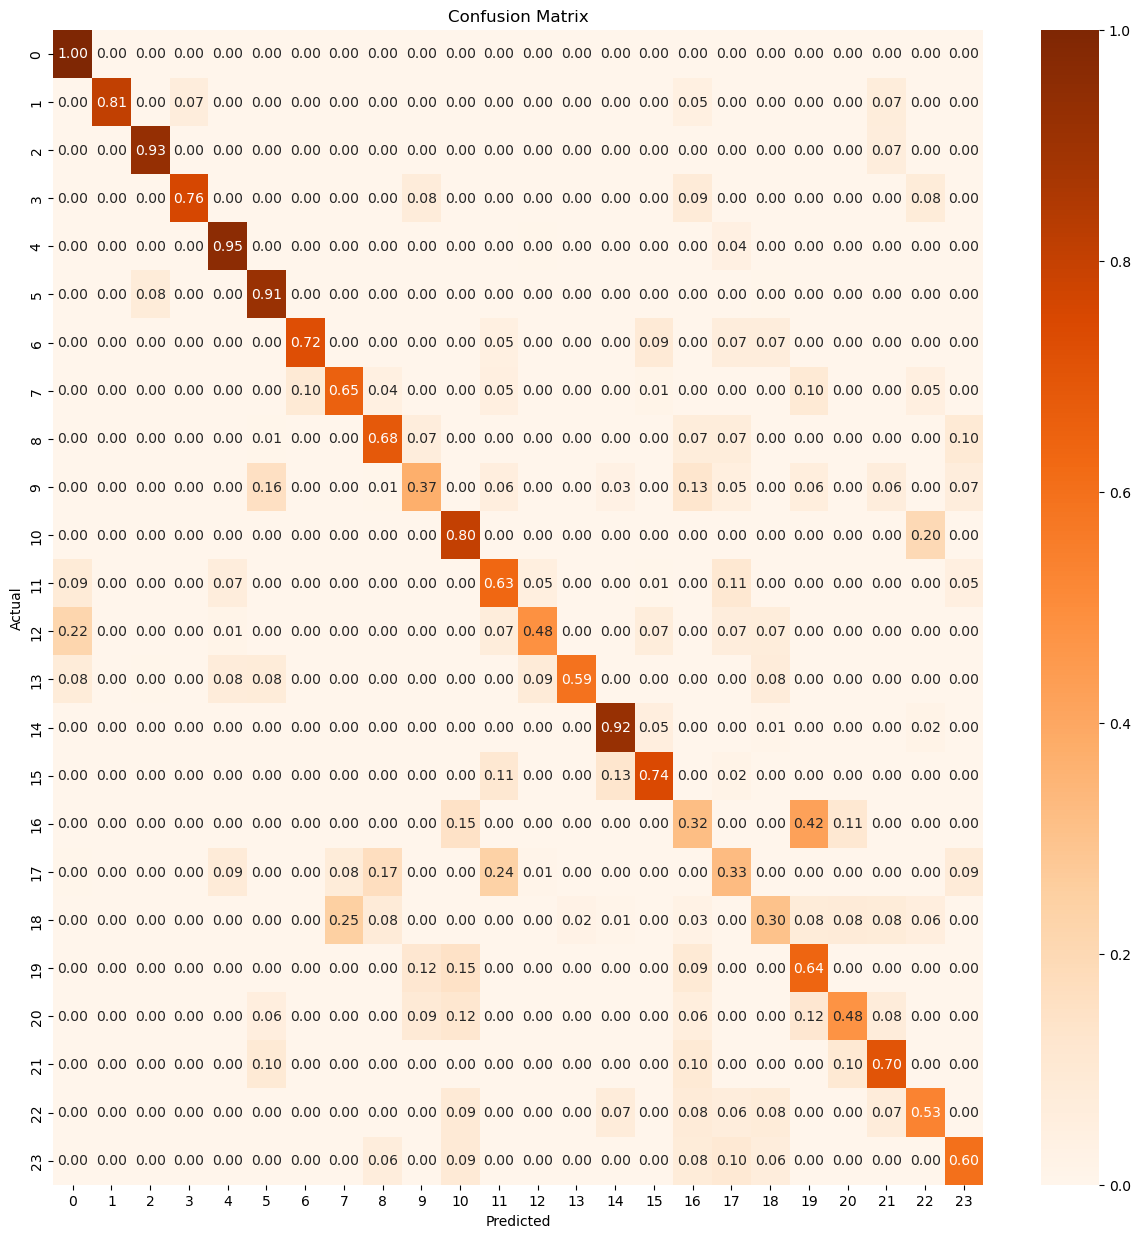

In [361]:
plt.figure(figsize=(8,8))
cm=metrics.confusion_matrix(y_test, log_predict)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(cmn, annot=True, fmt='.2f',cmap='Oranges')
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False);

In [362]:
#storing Results

storeResults("Logistic Regression", x_test_accuracy, x_train_accuracy)

### 6.2. Decision Trees: Classifier

Decision Trees are a popular supervised learning algorithm used for classification and regression tasks. They create a tree-like model where each internal node represents a feature, each branch represents a decision based on that feature, and each leaf node represents a class label (in classification) or a predicted value (in regression). The algorithm splits the data based on the features that provide the best separation at each node, aiming to minimize impurity or maximize information gain. Decision Trees are interpretable, handle both numerical and categorical data, and can be combined to form powerful ensemble methods like Random Forests and Gradient Boosting.

In [363]:
from sklearn.tree import  DecisionTreeClassifier

tree_clf = Pipeline([
    ('reduce-dims', PCA(n_components=113)),
    ('model', DecisionTreeClassifier(max_depth=30))
])

tree_clf.fit(x_train, y_train)

Pipeline(steps=[('reduce-dims', PCA(n_components=113)),
                ('model', DecisionTreeClassifier(max_depth=30))])

In [364]:
y_train_tree = tree_clf.predict(x_train)
y_test_tree = tree_clf.predict(x_test)

In [365]:
#computing the accuracy of the model performance
acc_train_tree = metrics.accuracy_score(y_train,y_train_tree)
acc_test_tree = metrics.accuracy_score(y_test,y_test_tree)


print("Decision Tree : Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree : Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree : Accuracy on training Data: 0.994
Decision Tree : Accuracy on test Data: 0.411


In [366]:
print(metrics.classification_report(y_test, y_test_tree))

              precision    recall  f1-score   support

           0       0.57      0.75      0.65       331
           1       0.54      0.56      0.55       432
           2       0.72      0.51      0.60       310
           3       0.33      0.45      0.38       245
           4       0.59      0.41      0.48       498
           5       0.48      0.64      0.55       247
           6       0.44      0.43      0.43       348
           7       0.65      0.63      0.64       436
           8       0.33      0.30      0.31       288
          10       0.14      0.07      0.09       331
          11       0.40      0.54      0.46       209
          12       0.35      0.29      0.32       394
          13       0.19      0.18      0.19       291
          14       0.49      0.42      0.45       246
          15       0.75      0.57      0.65       347
          16       0.36      0.41      0.39       164
          17       0.32      0.58      0.41       144
          18       0.22    

<Figure size 1000x1000 with 0 Axes>

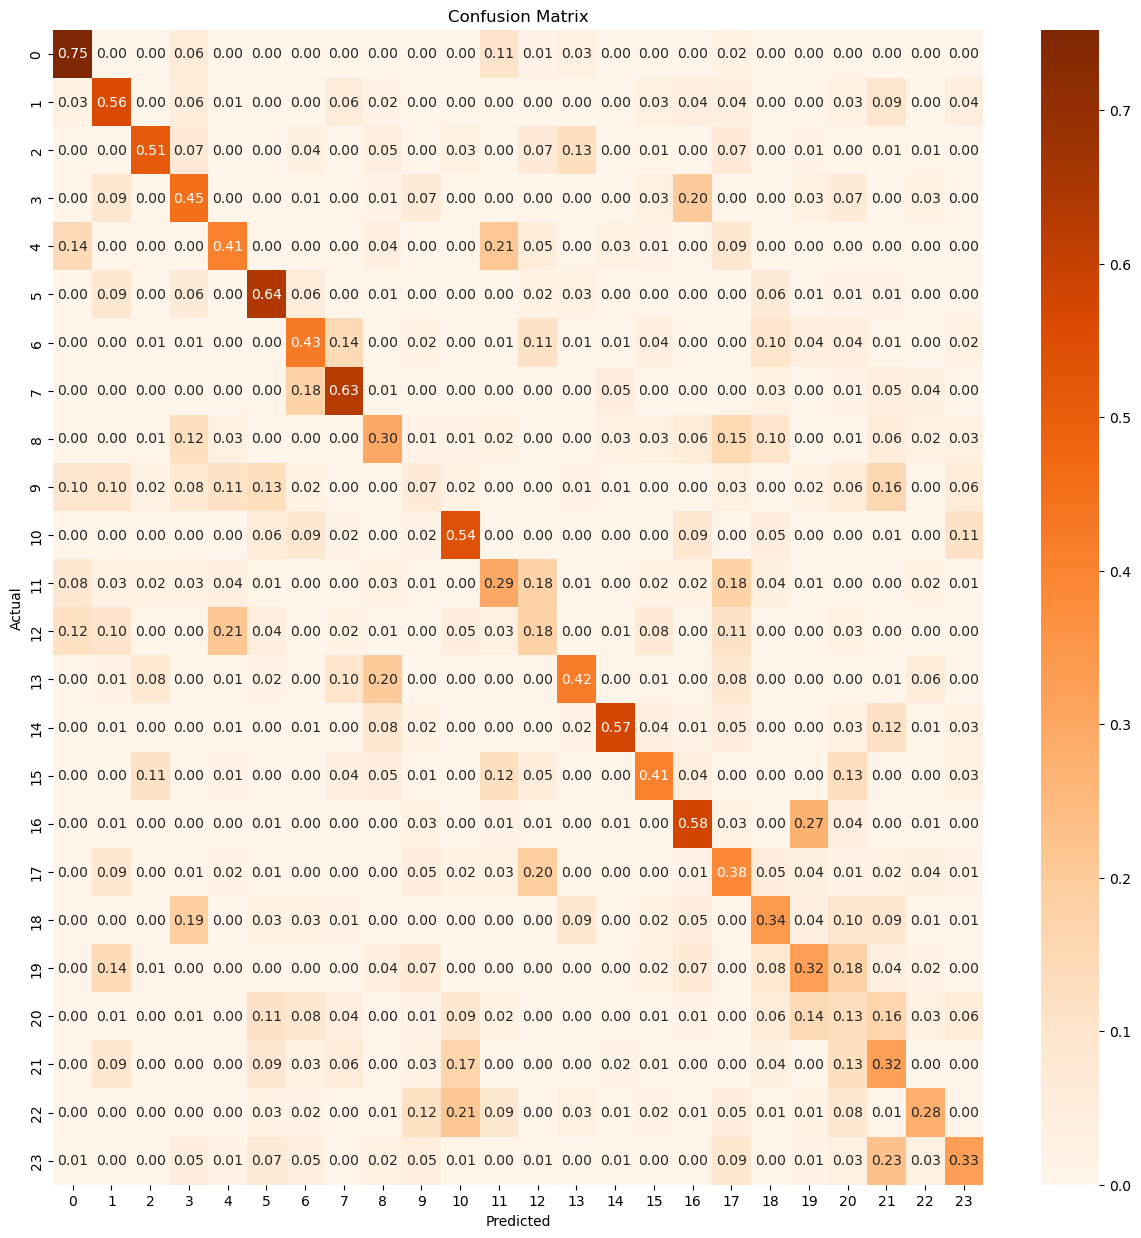

In [367]:

plt.figure(figsize=(10,10))
cm=metrics.confusion_matrix(y_test,y_test_tree)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(cmn, annot=True, fmt='.2f',cmap='Oranges')
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False);

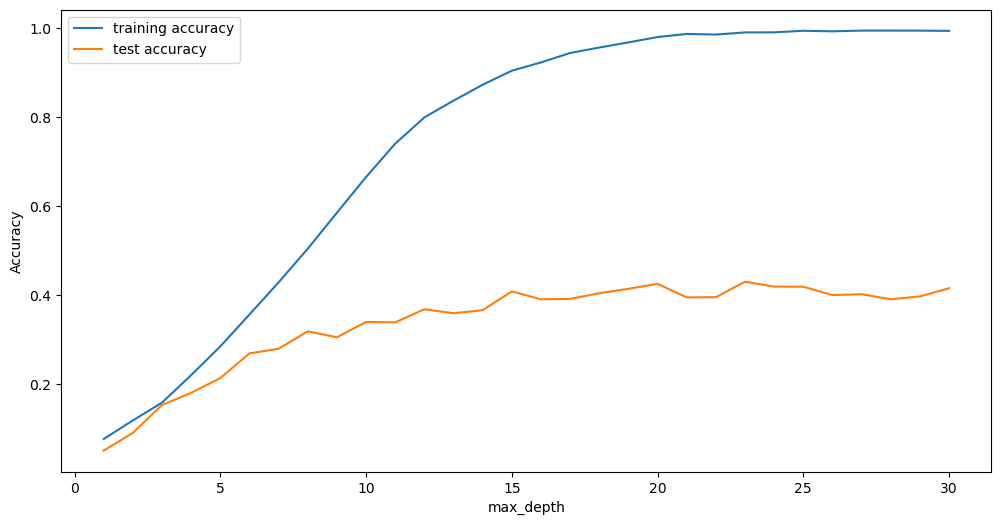

In [272]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1,31)
for n in depth:
    tree_test = Pipeline([('reduce_dims', PCA(n_components=113)),
                    ('model', DecisionTreeClassifier(max_depth=n))])

    tree_test.fit(x_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree_test.score(x_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree_test.score(x_test, y_test))
    

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

#### Observations
We can see that test accuracy is saturated after max-depth of 15 and same goes for train accuracy

In [368]:
storeResults('Decision Tree',acc_test_tree, acc_train_tree)

### 6.3. Support Vector Machines


Support Vector Machine (SVM) is a powerful supervised learning algorithm used for classification and regression tasks. In the context of classification, SVM finds the optimal hyperplane that best separates data points belonging to different classes in a high-dimensional space. It aims to maximize the margin (distance) between the two classes, allowing for better generalization to new, unseen data. SVM can handle linearly separable and non-linearly separable data by using various kernel functions, such as the polynomial or radial basis function (RBF) kernel. SVM is widely used in various applications like image recognition, text classification, and bioinformatics. It is known for its ability to handle complex datasets and generalization capabilities.

In [369]:
# Support Vector Classifier model 
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

# instantiate the model
svc= Pipeline([('reduce_dims', PCA(n_components=113)),('model', SVC())])

# fit the model 
svc.fit(x_train,y_train)

Pipeline(steps=[('reduce_dims', PCA(n_components=113)), ('model', SVC())])

In [370]:
y_train_svc = svc.predict(x_train)
y_test_svc = svc.predict(x_test)

In [371]:
acc_train_svc = metrics.accuracy_score(y_train,y_train_svc)
acc_test_svc = metrics.accuracy_score(y_test,y_test_svc)

print("Support Vector Machine : Accuracy on training Data: {:.3f}".format(acc_train_svc))
print("Support Vector Machine : Accuracy on test Data: {:.3f}".format(acc_test_svc))

Support Vector Machine : Accuracy on training Data: 1.000
Support Vector Machine : Accuracy on test Data: 0.852


In [372]:
print(metrics.classification_report(y_test, y_test_svc))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       331
           1       1.00      0.99      1.00       432
           2       0.87      0.99      0.93       310
           3       0.94      1.00      0.97       245
           4       0.95      0.99      0.97       498
           5       0.75      0.83      0.79       247
           6       0.94      0.91      0.92       348
           7       0.97      0.95      0.96       436
           8       0.82      0.89      0.86       288
          10       0.82      0.66      0.73       331
          11       0.87      1.00      0.93       209
          12       0.85      0.75      0.80       394
          13       0.90      0.68      0.77       291
          14       0.99      0.84      0.91       246
          15       1.00      1.00      1.00       347
          16       1.00      0.99      1.00       164
          17       0.32      0.62      0.42       144
          18       0.69    

<Figure size 1000x1000 with 0 Axes>

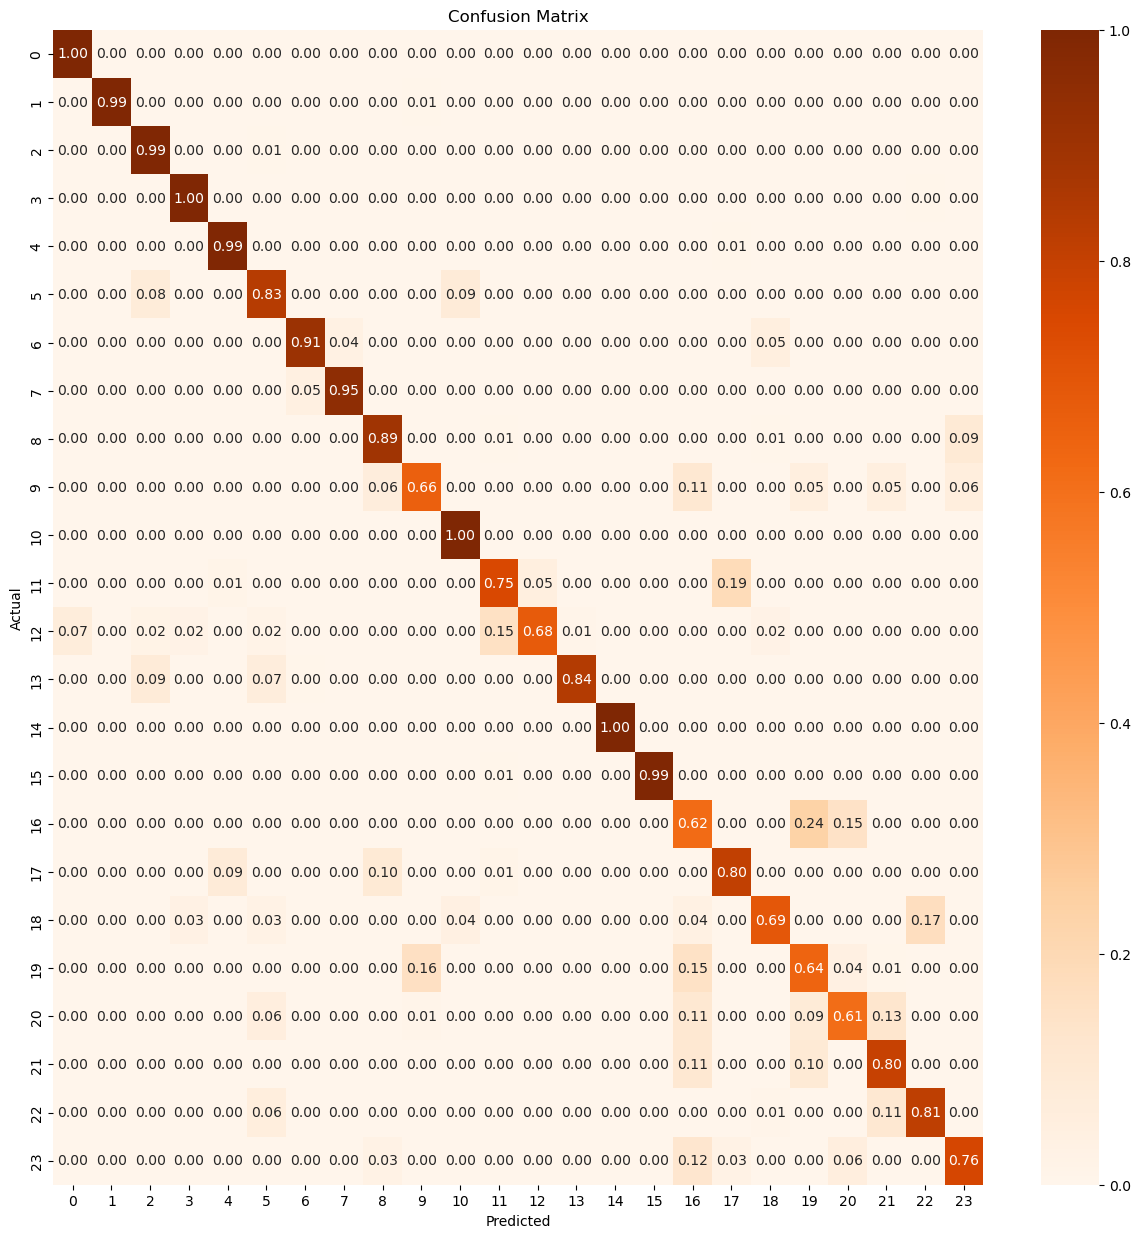

In [373]:
plt.figure(figsize=(10,10))
cm=metrics.confusion_matrix(y_test,y_test_svc)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(cmn, annot=True, fmt='.2f',cmap='Oranges')
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False);

In [374]:
storeResults('Support Vector Machine',acc_test_svc, acc_train_svc)

### Random Forest : Classifier

Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

In [375]:
# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# instantiate the model
forest = Pipeline([('reduce_dims', PCA(n_components=113)),
                ('model', RandomForestClassifier(n_estimators=100))])

# fit the model 
forest.fit(x_train,y_train)

Pipeline(steps=[('reduce_dims', PCA(n_components=113)),
                ('model', RandomForestClassifier())])

In [376]:
y_train_forest = forest.predict(x_train)
y_test_forest = forest.predict(x_test)

In [377]:
acc_train_forest = metrics.accuracy_score(y_train,y_train_forest)
acc_test_forest = metrics.accuracy_score(y_test,y_test_forest)

print("Random Forest : Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest : Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random Forest : Accuracy on training Data: 1.000
Random Forest : Accuracy on test Data: 0.783


In [378]:
print(metrics.classification_report(y_test, y_test_forest))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       331
           1       0.96      0.94      0.95       432
           2       0.89      0.97      0.93       310
           3       0.92      1.00      0.96       245
           4       0.88      0.94      0.91       498
           5       0.89      0.91      0.90       247
           6       0.93      0.81      0.87       348
           7       0.93      0.88      0.90       436
           8       0.77      0.75      0.76       288
          10       0.73      0.63      0.68       331
          11       0.79      1.00      0.89       209
          12       0.69      0.63      0.66       394
          13       0.72      0.46      0.56       291
          14       0.94      0.67      0.78       246
          15       0.93      1.00      0.96       347
          16       0.80      0.91      0.85       164
          17       0.36      0.65      0.47       144
          18       0.57    

<Figure size 1000x1000 with 0 Axes>

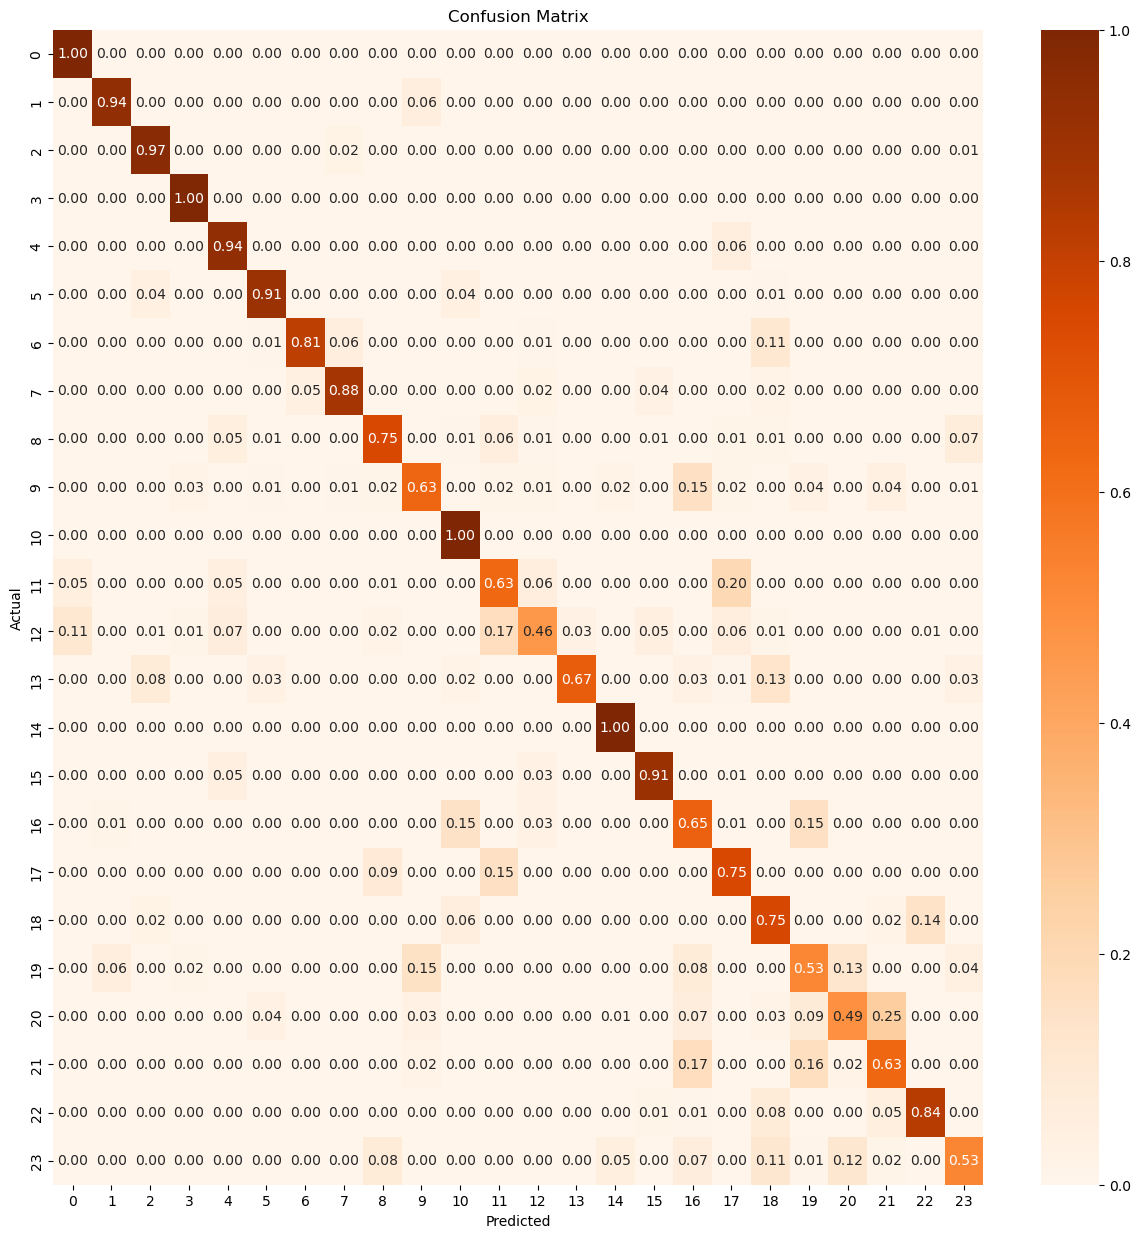

In [379]:
plt.figure(figsize=(10,10))
cm=metrics.confusion_matrix(y_test,y_test_forest)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(cmn, annot=True, fmt='.2f',cmap='Oranges')
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False);

In [380]:
storeResults('Random Forest',acc_test_forest, acc_train_forest)

### 6.5. Naive Bayes : Classifier


Naive Bayes is a simple and efficient supervised learning algorithm used for classification tasks. It is based on Bayes' theorem and assumes that all features are conditionally independent given the class label. Despite its "naive" assumption, it often performs well in practice and is computationally efficient.

In the context of classification, Naive Bayes calculates the probability of each class label given the observed features of the input data. It does this by computing the prior probabilities of each class and the likelihood of the features given each class. The final class prediction is based on the class with the highest probability.

Naive Bayes is commonly used in text classification, spam filtering, sentiment analysis, and other tasks involving high-dimensional data with discrete or categorical features. It works well with relatively small datasets and can be a good choice for quick and baseline models in classification problems.

In [301]:
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

# instantiate the model
nb= Pipeline([('reduce_dims', PCA(n_components=113)),('model', GaussianNB())])

# fit the model 
nb.fit(x_train,y_train)

Pipeline(steps=[('reduce_dims', PCA(n_components=113)),
                ('model', GaussianNB())])

In [303]:
y_train_nb = nb.predict(x_train)
y_test_nb = nb.predict(x_test)


In [304]:
acc_train_nb =  metrics.accuracy_score(y_train,y_train_nb)
acc_test_nb =  metrics.accuracy_score(y_test,y_test_nb)

print("Naive Bayes : Accuracy on training Data: {:.3f}".format(acc_train_nb))
print("Naive Bayes : Accuracy on test Data: {:.3f}".format(acc_test_nb))

Naive Bayes : Accuracy on training Data: 0.797
Naive Bayes : Accuracy on test Data: 0.628


In [305]:
print(metrics.classification_report(y_test, y_test_nb))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84       331
           1       0.93      0.83      0.87       432
           2       1.00      0.78      0.88       310
           3       0.69      0.71      0.70       245
           4       0.85      0.73      0.79       498
           5       0.65      0.61      0.63       247
           6       0.82      0.62      0.71       348
           7       0.93      0.80      0.86       436
           8       0.66      0.56      0.61       288
          10       0.59      0.42      0.49       331
          11       0.76      0.84      0.80       209
          12       0.78      0.50      0.61       394
          13       0.42      0.39      0.40       291
          14       0.84      0.72      0.78       246
          15       0.71      0.50      0.58       347
          16       0.35      0.88      0.50       164
          17       0.23      0.64      0.34       144
          18       0.40    

<Figure size 1000x1000 with 0 Axes>

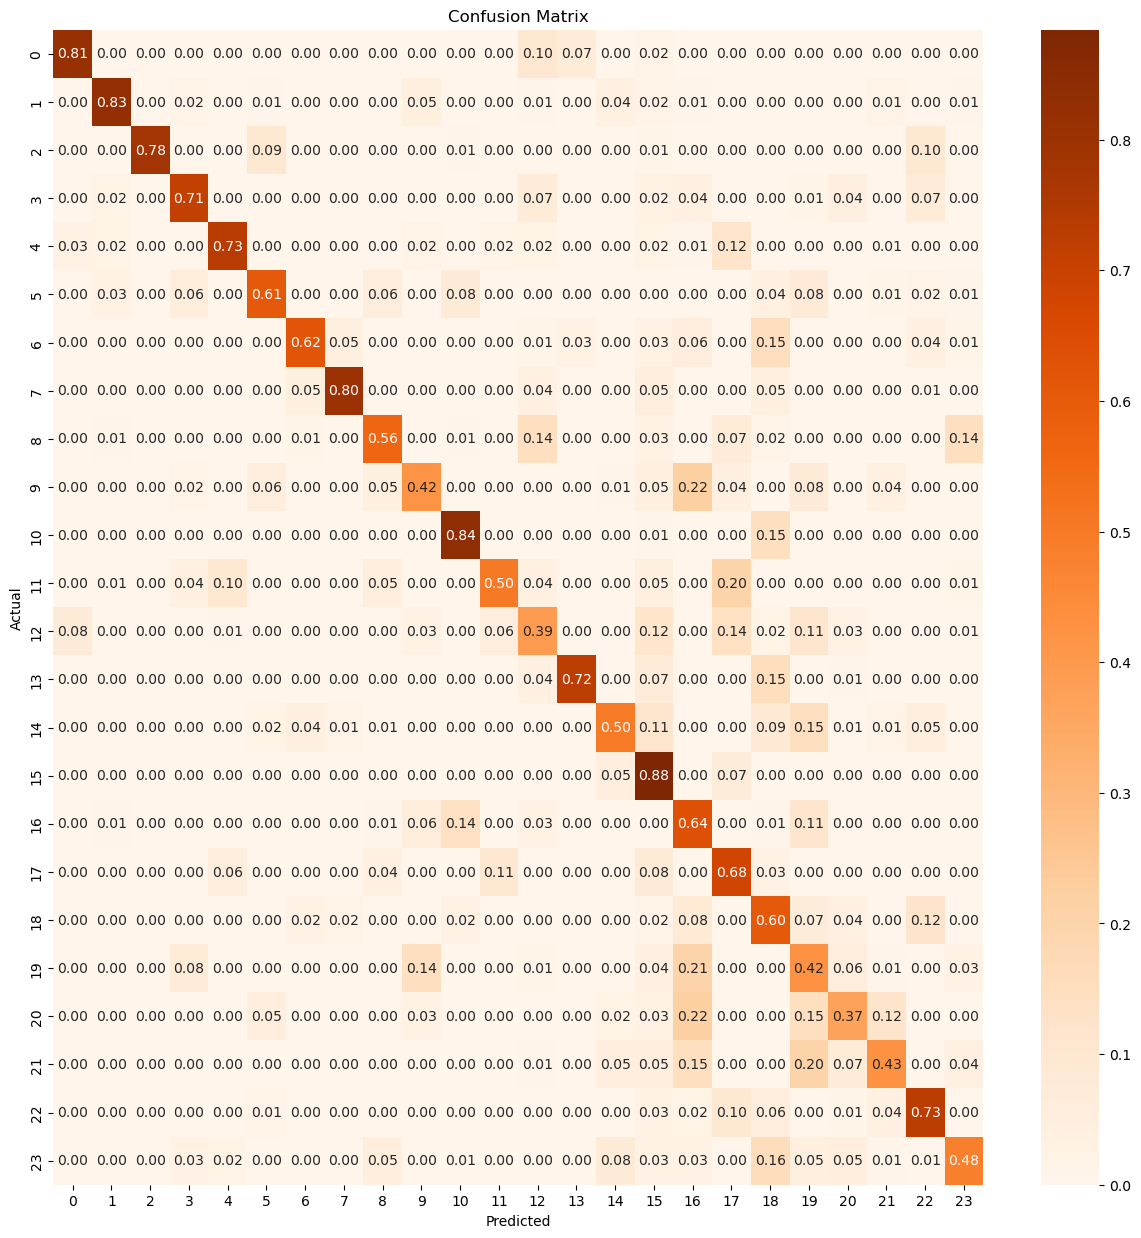

In [306]:
plt.figure(figsize=(10,10))
cm=metrics.confusion_matrix(y_test,y_test_nb)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(cmn, annot=True, fmt='.2f',cmap='Oranges')
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False);

In [307]:
#storing the results. The below mentioned order of parameter passing is important.
storeResults('Naive Bayes',acc_train_nb, acc_test_nb)

### 6.6. K-Nearest Neighbors : Classifier

Naive Bayes is a simple and efficient classification algorithm based on Bayes' theorem. It assumes that features are conditionally independent given the class label, making it computationally efficient. Despite its "naive" assumption, it often performs well in practice and is commonly used for text classification and other tasks with discrete features.

In [381]:
# K-Nearest Neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

# instantiate the model
knn = Pipeline([('reduce_dims', PCA(n_components=113)),('model', KNeighborsClassifier())])

# fit the model 
knn.fit(x_train,y_train)

Pipeline(steps=[('reduce_dims', PCA(n_components=113)),
                ('model', KNeighborsClassifier())])

In [382]:
y_train_knn = knn.predict(x_train)
y_test_knn = knn.predict(x_test)

In [383]:
acc_train_knn = metrics.accuracy_score(y_train,y_train_knn)
acc_test_knn = metrics.accuracy_score(y_test,y_test_knn)

print("K neighest neighbour : Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("K neighest neighbour : Accuracy on test Data: {:.3f}".format(acc_test_knn))

K neighest neighbour : Accuracy on training Data: 0.999
K neighest neighbour : Accuracy on test Data: 0.815


In [384]:
print(metrics.classification_report(y_test, y_test_knn))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       331
           1       0.95      0.93      0.94       432
           2       0.97      1.00      0.99       310
           3       0.76      0.93      0.84       245
           4       0.79      0.97      0.87       498
           5       0.89      0.93      0.91       247
           6       0.91      0.94      0.92       348
           7       0.96      0.95      0.96       436
           8       0.88      0.69      0.78       288
          10       0.83      0.60      0.69       331
          11       0.95      0.94      0.94       209
          12       0.80      0.52      0.63       394
          13       0.80      0.64      0.71       291
          14       1.00      0.92      0.96       246
          15       0.99      1.00      1.00       347
          16       0.95      1.00      0.98       164
          17       0.33      0.62      0.43       144
          18       0.67    

<Figure size 1000x1000 with 0 Axes>

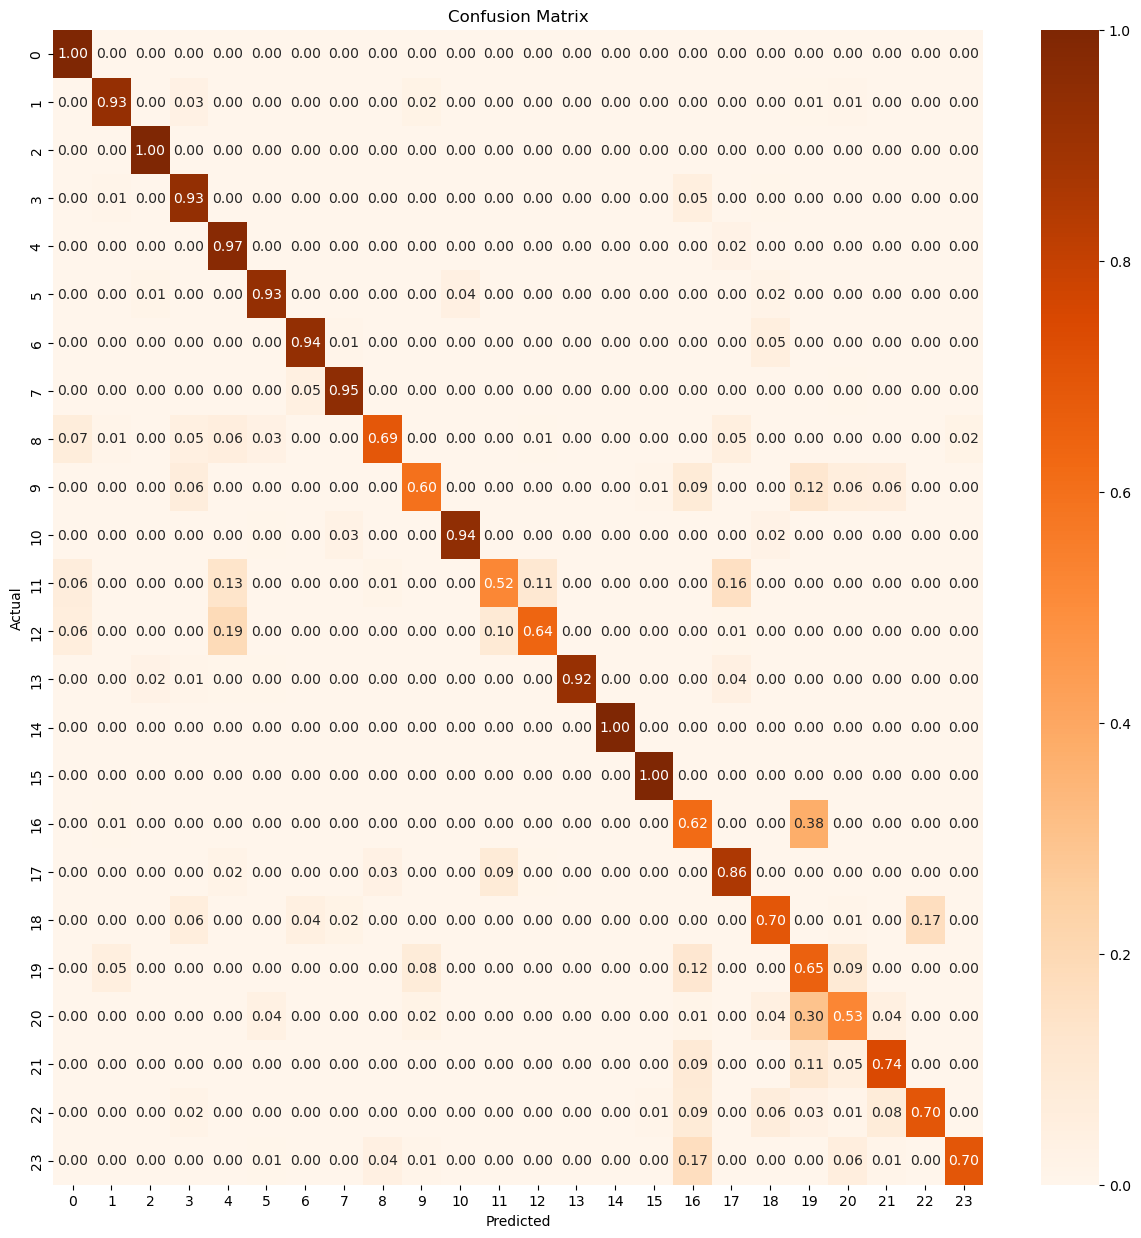

In [385]:
#visualization of Confusion Matrix 

plt.figure(figsize=(10,10))
cm=metrics.confusion_matrix(y_test,y_test_knn)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(cmn, annot=True, fmt='.2f',cmap='Oranges')
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False);

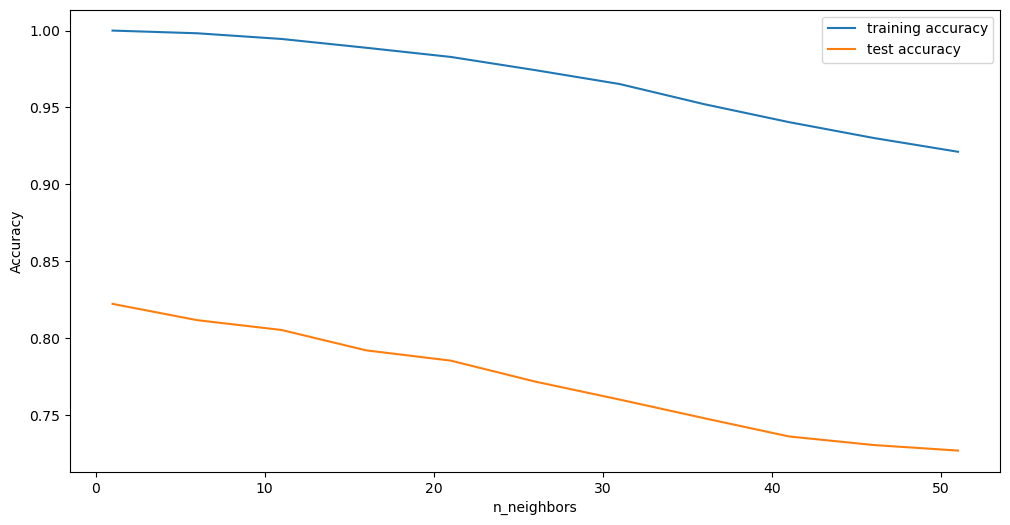

In [315]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 50
depth = range(1,52,5)
for n in depth:
    knn = Pipeline([('reduce_dims', PCA(n_components=113)),
                    ('model', KNeighborsClassifier(n_neighbors=n))])

    knn.fit(x_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(x_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(x_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_neighbors")
plt.legend()

In [386]:
#storing the results. The below mentioned order of parameter passing is important.
storeResults('K-Nearest Neighbors',acc_test_knn, acc_train_knn)

## 7. Deep Learning using CNN

Convolutional Neural Networks (CNNs) are a class of deep learning models designed for image and pattern recognition tasks. They have revolutionized computer vision and have been widely used in various applications, including image classification, object detection, and image segmentation.

Key features of CNNs:

- Convolutional Layers: CNNs use convolutional layers to detect patterns and features from input images. These layers employ small filters (also known as kernels) to slide over the input and perform element-wise multiplications followed by summations to create feature maps.

- Pooling Layers: Pooling layers downsample feature maps, reducing the spatial dimensions. Common pooling operations include max pooling, where the maximum value within a sliding window is taken, and average pooling, where the average value is considered.

- Activation Functions: Non-linear activation functions, such as ReLU (Rectified Linear Unit), are used to introduce non-linearity and enable CNNs to learn complex relationships in the data.

- Fully Connected Layers: After multiple convolutional and pooling layers, the extracted features are passed to fully connected layers for classification or regression tasks.

- Parameter Sharing: CNNs employ parameter sharing, which means the same filter is applied to different parts of the image, reducing the number of parameters and making them computationally efficient.

- Transfer Learning: CNNs are often pre-trained on large image datasets and fine-tuned for specific tasks. This transfer learning approach helps in achieving better performance with limited training data.

CNNs have achieved state-of-the-art results on various computer vision tasks and continue to be an active area of research and development in the field of deep learning.

In [317]:
x_train = x_train.reshape(len(x_train),28,28,1)
x_train = x_train/255.0
x_valid = x_valid.reshape(len(x_valid),28,28,1)
x_valid = x_valid/255.0

x_train.shape, y_train.shape, x_valid.shape, y_valid.shape

((27455, 28, 28, 1), (27455,), (7172, 28, 28, 1), (7172,))

In [318]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(15, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dense(26, activation='softmax'))

In [319]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train,y_train, epochs=7, validation_data=(x_valid,y_valid))
model.save('sign_language_mnist_cnn.h5')

Epoch 1/7
858/858 [==============================] - 10s 10ms/step - loss: 1.3434 - accuracy: 0.5816 - val_loss: 0.5039 - val_accuracy: 0.8185
Epoch 2/7
858/858 [==============================] - 8s 10ms/step - loss: 0.2685 - accuracy: 0.9101 - val_loss: 0.3511 - val_accuracy: 0.8795
Epoch 3/7
858/858 [==============================] - 8s 10ms/step - loss: 0.1146 - accuracy: 0.9618 - val_loss: 0.3492 - val_accuracy: 0.8996
Epoch 4/7
858/858 [==============================] - 9s 10ms/step - loss: 0.0726 - accuracy: 0.9771 - val_loss: 0.3280 - val_accuracy: 0.9081
Epoch 5/7
858/858 [==============================] - 8s 10ms/step - loss: 0.0545 - accuracy: 0.9815 - val_loss: 0.3109 - val_accuracy: 0.9197
Epoch 6/7
858/858 [==============================] - 8s 10ms/step - loss: 0.0429 - accuracy: 0.9865 - val_loss: 0.3939 - val_accuracy: 0.8926
Epoch 7/7
858/858 [==============================] - 8s 10ms/step - loss: 0.0392 - accuracy: 0.9875 - val_loss: 0.3987 - val_accuracy: 0.9023


In [324]:
testImage = x_valid[:24] #We will take an image from the training dataset
# prediction = model.predict(testImage.reshape(-1,28,28,1)) #Model takes input as 4 dimen
# prediction.shape
prediction = model.predict(testImage.reshape(24, 28, 28, 1))
prediction.shape

1/1 [==============================] - 0s 18ms/step


(24, 26)

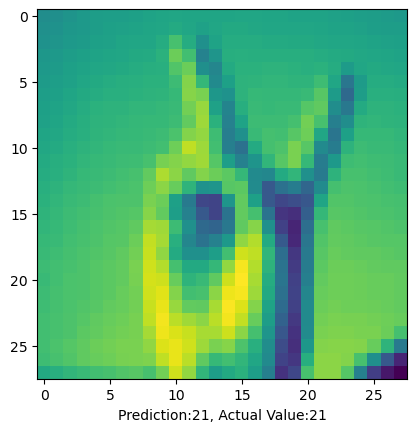

In [114]:
plt.imshow(testImage.reshape(28, 28)) #plt.imshow() requires a 2D array, so we reshape the input
plt.xlabel(f"Prediction:{np.argmax(prediction)}, Actual Value:{y_valid[35]}")
plt.show()

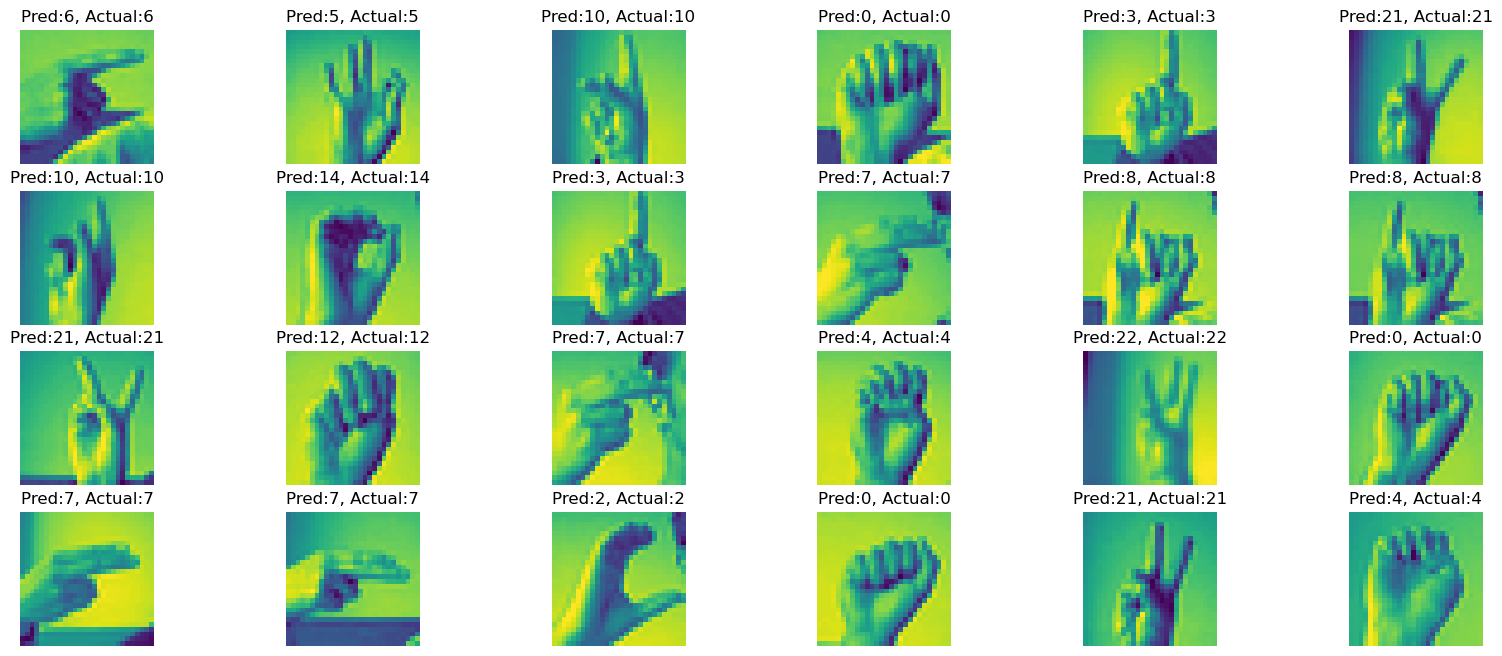

In [327]:
fig = plt.figure(figsize=(20, 8))
for i in range (24):
    fig.add_subplot(4, 6, i+1)
    plt.imshow(x_valid[i].reshape(28,28))
    plt.axis('off')
    plt.title(f"Pred:{np.argmax(prediction[i])}, Actual:{y_valid[i]}")


## 8. Comparasion

In [390]:
result = pd.DataFrame({ 'ML Model': Model_name,
                        'Train Accuracy': acc_test,
                        'Test Accuracy': acc_train,})

In [391]:
result

,ML Model,Train Accuracy,Test Accuracy
0,<keras.src.engine.sequential.Sequential object...,1.000000,0.666481
1,<keras.src.engine.sequential.Sequential object...,0.994391,0.410625
2,<keras.src.engine.sequential.Sequential object...,0.999964,0.851924
3,<keras.src.engine.sequential.Sequential object...,1.000000,0.783185
4,<keras.src.engine.sequential.Sequential object...,0.998834,0.815114


## OBSERVATIONS

So we can see that (maybe not very clearly) SVM performed best on both training and testing dataset among the standered machine learning algorithms.

The most important observations was that after a certain value, the testing accuracy is being saturated a some point both in svm and random forest classifier.

To overcome this barrier we needed to switch to Deep Learning Algorithms. We used CNN here to classify our data and we can observe that CNN performed 90% accuracy on testing dataset. Which is the highest among all the models we have used